# <font color='Brown'>***Project Titile : Heart Disease Prediction***</font>

**Description**:<font color='Black'>  Our innovative machine learning model aims to revolutionize heart disease prediction by leveraging advanced algorithms to analyze diverse patient data and provide accurate risk assessments. Heart disease remains a leading cause of mortality worldwide, making early detection crucial for effective intervention and prevention.</font>
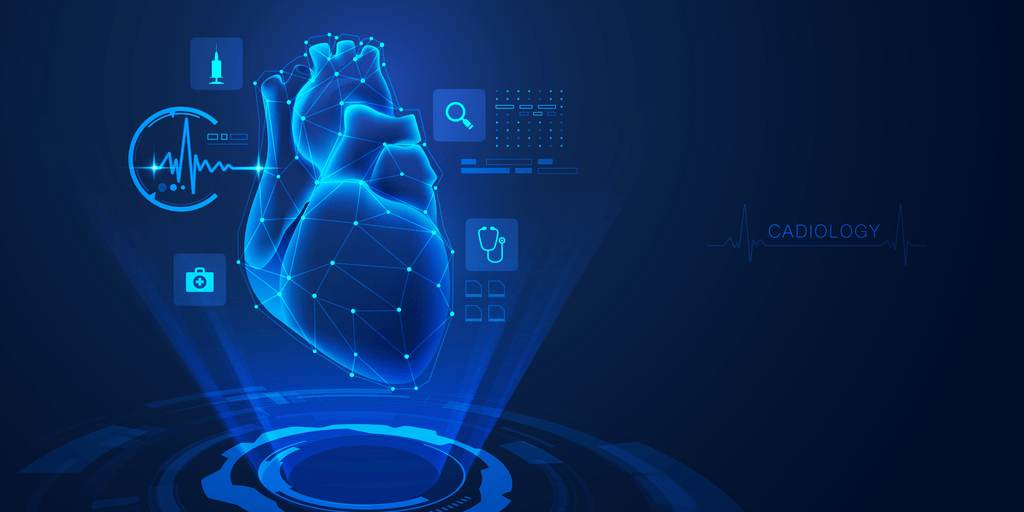

## <font color='Red'> Problem Statement: </font>  
<font color='gray'> Despite significant advancements in medical science, heart disease continues to be a major global health concern, representing a leading cause of morbidity and mortality. Early detection and timely intervention are critical for mitigating the impact of heart-related conditions. Traditional risk assessment methods often rely on a limited set of factors, leading to suboptimal accuracy in predicting individualized risk.The challenge lies in developing a robust and accurate predictive model for heart disease that integrates a diverse range of patient data, including demographic information, medical history, lifestyle factors, and clinical test results.</font>

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# <font color='Brown'>Reading Dataset </font>

In [2]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1)age: The person's age in years.

2)sex: The person's sex (1 = male, 0 = female).

3)cp: The chest pain experienced (Value 0: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic).

4)trestbps: The person's resting blood pressure (mm Hg on admission to the hospital).

5)chol: The person's cholesterol measurement in mg/dl.

6)fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).

7)restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).

8)thalach: The person's maximum heart rate achieved.

9)exang: Exercise induced angina (1 = yes; 0 = no).

10)oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11)slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping).

12)ca: The number of major vessels (0-3).

13)thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

14)target: Heart disease (0 = no, 1 = yes).

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(303, 14)

**We have 303 Rows and 14 columns in the Dataset.**

In [5]:
 data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## <font color='Brown'> Checking Null Values</font>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we don't have any null values present in our Dataset.

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
import ydata_profiling as pp
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
print(data.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


**This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.**

# <font color='Red'>Explotary Data Analysis(EDA)</font>

In [11]:
x = data["target"]

target
1    165
0    138
Name: count, dtype: int64


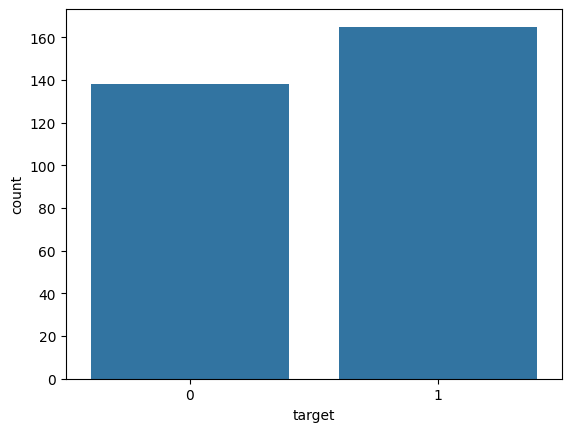

In [12]:
countplot_1 = sns.countplot(x=data["target"])
count= data.target.value_counts()
print(count)

**From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1).**

## <font color='Red'> How much percentage of people with and without Heart Disease problem in Dataset.</font>

In [13]:
print("Percentage of patience without heart problems: "+str(round(count[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(count[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


<Axes: xlabel='sex', ylabel='target'>

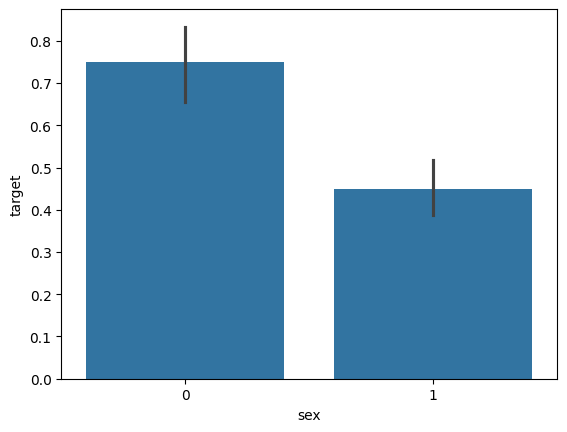

In [14]:
sns.barplot(x="sex",y="target",data=data)

In [15]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


## Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease).

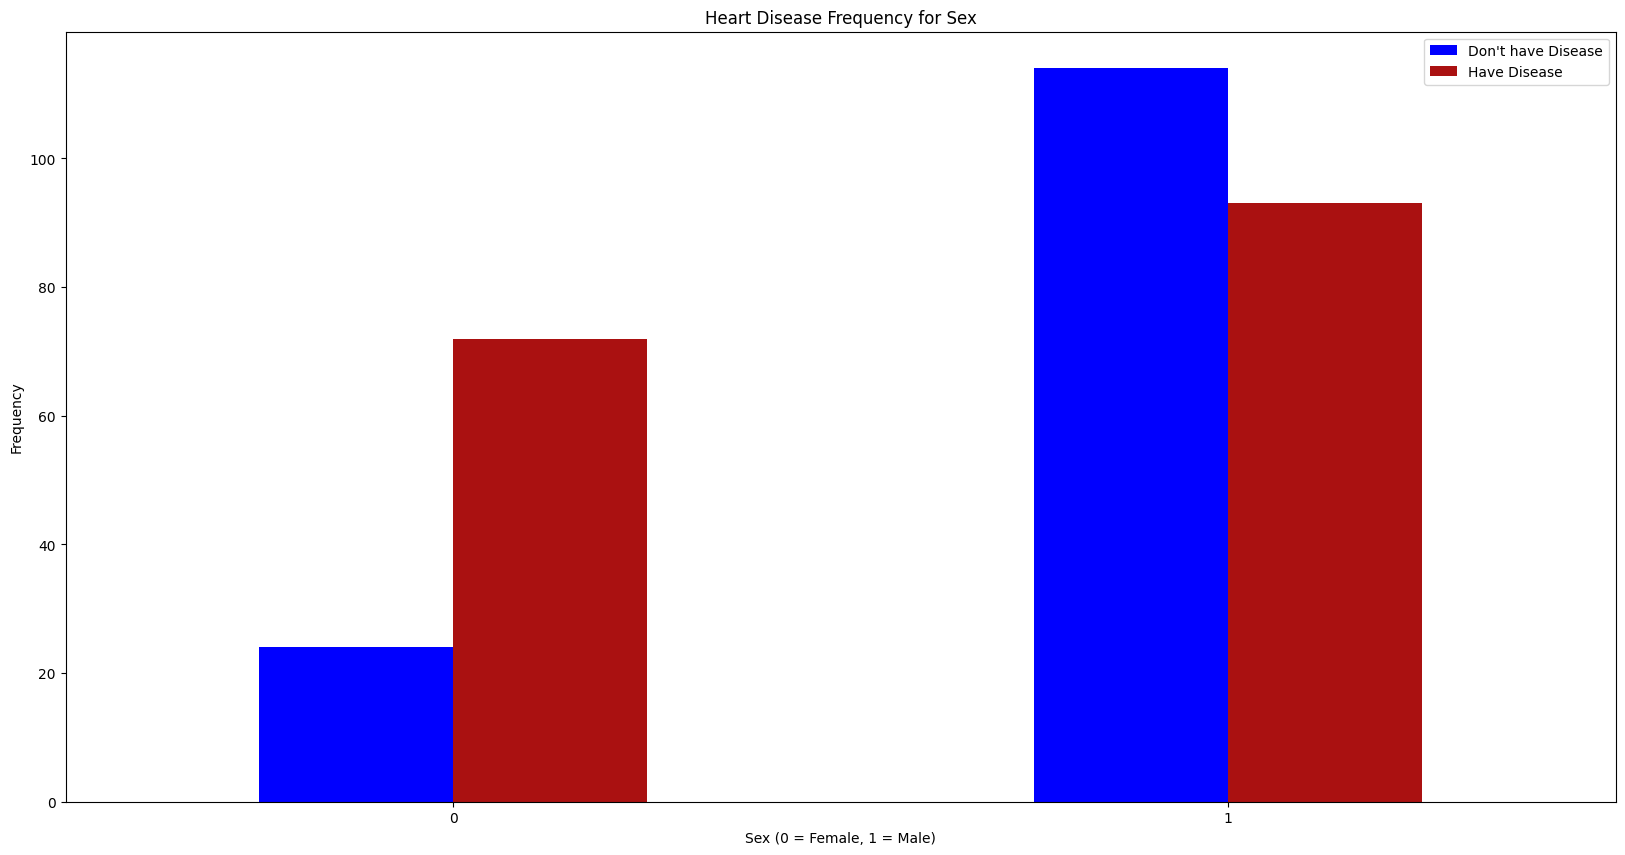

In [16]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## Analysing the chest pain.

In [17]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

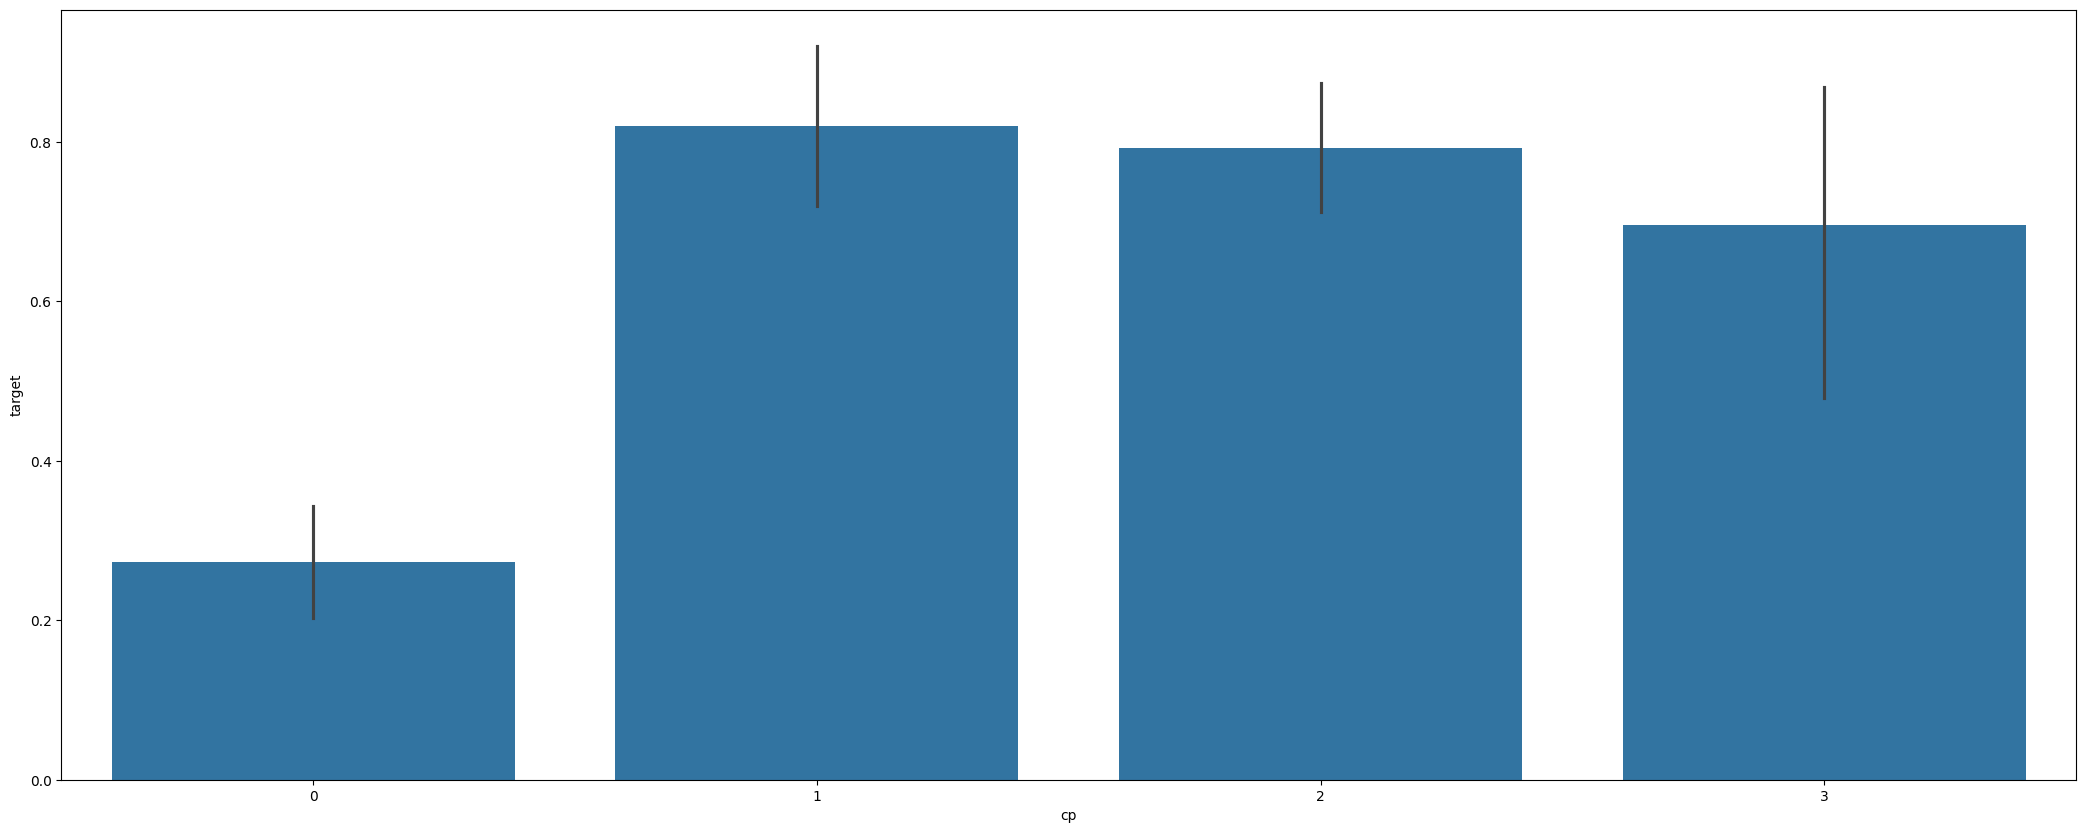

In [18]:
plt.figure(figsize=(26, 10))
sns.barplot(x="cp",y="target",data=data)

## Heatmap

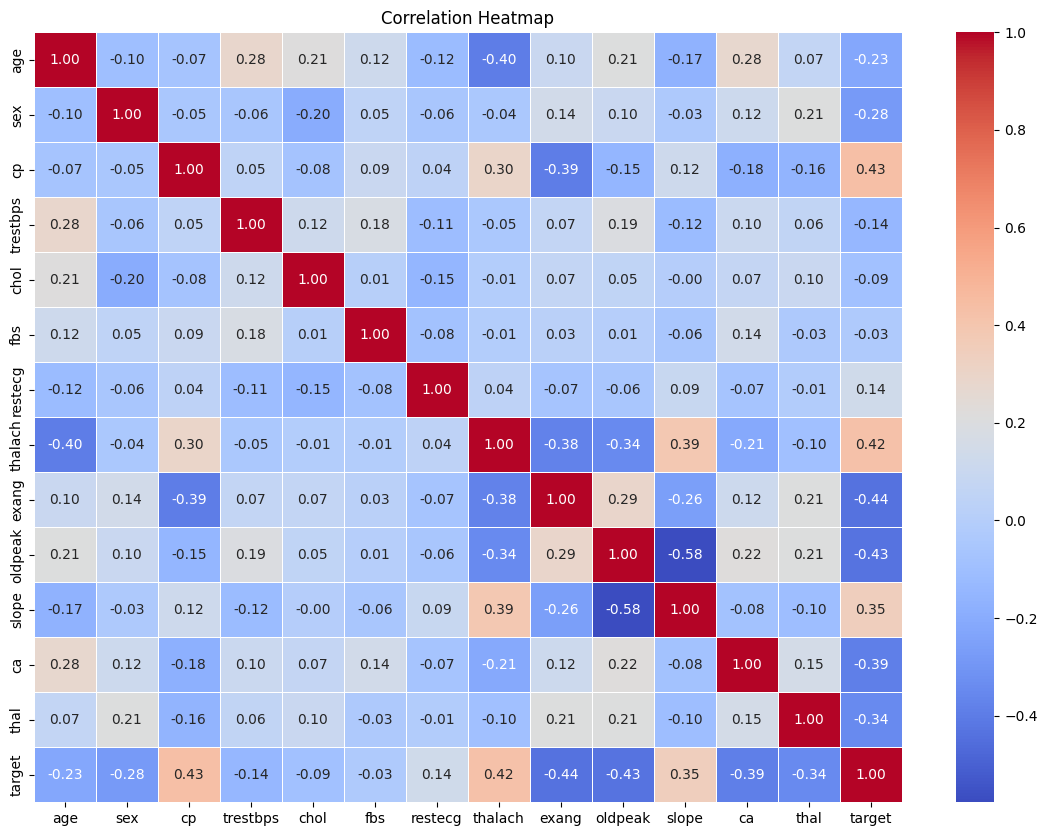

In [19]:
correlation_matrix = data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

#  Creating the independent variable(X) and dependent variable(y)

In [20]:
x = data.drop(columns=["target"])
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = data["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = (train_test_split(x,y, test_size=0.3,random_state=42))

In [23]:
x_train.shape

(212, 13)

In [24]:
x_test.shape

(91, 13)

In [25]:
y_train.shape

(212,)

In [26]:
y_test.shape

(91,)

# Scaling Features

In [27]:
len(x_train.columns)

13

In [28]:
steps = [
    ('scaler', StandardScaler()),  # StandardScaler as the first step
    ('random_forest', RandomForestClassifier(
        n_estimators=200,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features="sqrt",
        max_depth=None,
        bootstrap=False 
    ))  # RandomForestClassifier as the second step
#     ("L",LogisticRegression())
]
pipe1 = Pipeline(steps)

In [29]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=4,
                                        n_estimators=200))])

In [30]:
y_prd=pipe1.predict(x_test)

In [31]:

accuracy_score(y_test,y_prd)

0.7912087912087912

In [ ]:
! pip install --upgrade scikit-learn==1.4.1.post1 --no-cache-dir --user


   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/10.6 MB 11.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.6 MB 10.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.0/10.6 MB 10.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.6 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 11.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import sklearn
print(sklearn.__version__)

1.6.1


In [34]:
from sklearn.preprocessing import StandardScaler
scaler_values = StandardScaler()
x_train = scaler_values.fit_transform(x_train)
x_test = scaler_values.fit_transform(x_test)


# <font color='Red'>Building Model by applying Machine Learning Algorithms.</font>

# Applying Random Forest

In [35]:

random_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
print(random_grid)

{'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train , y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   verbose=2)

In [37]:
rf_model = rf_random.best_params_
rf_model

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [38]:
y_predicted_rf = rf_random.predict(x_test)
y_predicted_rf

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

# Making confusion matrix

<font color = 'Red'>**It's used to evaluate the performance of a classification model. It provides a detailed breakdown of the model's predictions compared to the actual classes in the dataset. The confusion matrix is particularly useful when dealing with binary classification problems, where there are two possible classes(positive or negative).***</font>

In [39]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_rf)
cm

array([[32,  9],
       [ 7, 43]], dtype=int64)

### **Observation:**  
<font color = 'Brown'>1)The model made 10 correct predictions for the negative class (True Negatives).  
2)There were 4 instances where the model predicted positive but the true class was negative (False Positives).  
3)There were 2 instances where the model predicted negative but the true class was positive (False Negatives).  
4)The model made 15 correct predictions for the positive class (True Positives). </font>


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score =accuracy_score(y_test, y_predicted_rf)
precision_score =precision_score(y_test, y_predicted_rf)
recall_score =recall_score(y_test, y_predicted_rf)
f1_score =f1_score(y_test, y_predicted_rf)




In [41]:
print(f"Accuracy: {accuracy_score:.2f}")
print(f"Precision: {precision_score:.2f}")
print(f"Recall: {recall_score:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.82
Precision: 0.83
Recall: 0.86
F1 Score: 0.84


1)F1-score is useful when there is an uneven class distribution.  
2)Recall provides insight into the model's ability to capture all positive instances.  
3)Precision gives an indication of the model's ability to avoid false positives.

# Creating Classification Report

***The classification report is a concise yet informative summary of the performance of a classification model. It is often used in machine learning to evaluate the performance of a classifier, especially in binary or multiclass classification problems.***

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_rf))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



# plotting heat map

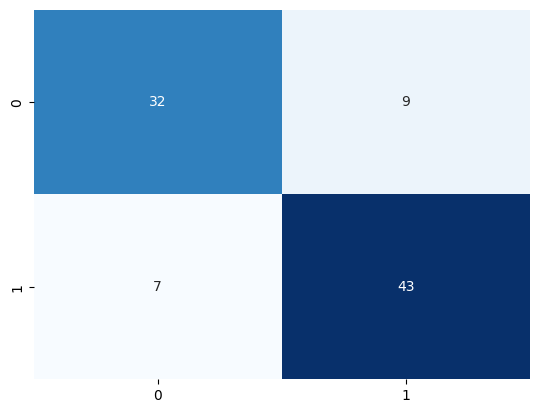

In [43]:
cm = confusion_matrix(y_test, y_predicted_rf)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.show()

# Testing Accuracy on base Model

In [44]:

from sklearn.metrics import accuracy_score
test_accuracy_rf = accuracy_score(y_test, y_predicted_rf)*100
print("Accracy Obtained:",test_accuracy_rf)

Accracy Obtained: 82.41758241758241


# Existing method Using kfold cross-validation

<font color='Blue'>***K-fold cross-validation is a resampling technique commonly used in machine learning for assessing the performance of a predictive model. The basic idea is to split the original dataset into K equally-sized folds (or subsets). The model is trained and evaluated K times, each time using a different fold as the testing set and the remaining folds as the training set.***</font> 

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
rf = RandomForestClassifier()


cv = KFold(n_splits=10, random_state=1, shuffle=True)
rf_random_kfold = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_kfold.fit(x_train , y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, verbose=2)

In [46]:
rf_model = rf_random_kfold.best_params_
rf_model

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [47]:
y_predicted_rf_kfold = rf_random_kfold.predict(x_test)
y_predicted_rf_kfold

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_rf_kfold)
cm

array([[32,  9],
       [ 9, 41]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_rf_kfold))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



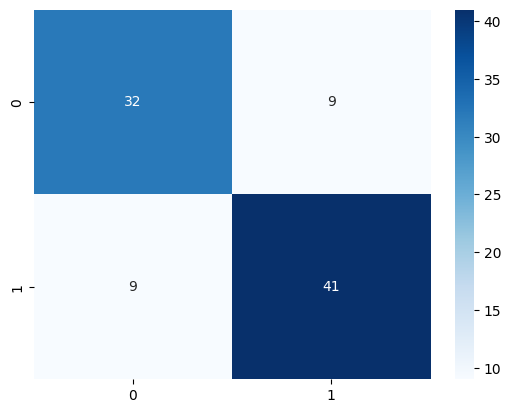

In [50]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
test_accuracy_rf_kfold = accuracy_score(y_test, y_predicted_rf_kfold)*100
print("Accuracy Obtained:",test_accuracy_rf_kfold)

Accuracy Obtained: 80.21978021978022


Conclusion:

1)The model shows a reasonably good overall accuracy (80.65%).  
2)Precision indicates a decent ability to correctly identify positive instances, with 79% precision.  
3)Recall is relatively high at 88%, indicating good sensitivity in capturing positive instances.  
4)The F1 score, which balances precision and recall, is also high at 0.83.  

In [52]:
x_train

array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

In [53]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, n_jobs = -1)

## Exporting Model ##

In [54]:
import pickle
pickle.dump(pipe1,open('pipe1.pkl','wb'))